In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-90.000,high=90.000,size=1500)

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
# for coordinate in coordinates:
#     print(coordinate[0], coordinate[1])

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 3 of Set 1 | okulovka
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | hun
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | cedar lake
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | middle island
Processing Record 14 of Set 1 | riyadh
Processing Record 15 of Set 1 | aflu
City not found. Skipping...
Processing Record 16 of Set 1 | adrar
Processing Record 17 of Set 1 | ambilobe
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | kerouane
Processing Record 22 of S

Processing Record 35 of Set 4 | gobabis
Processing Record 36 of Set 4 | wukari
Processing Record 37 of Set 4 | vila do maio
Processing Record 38 of Set 4 | sorvag
City not found. Skipping...
Processing Record 39 of Set 4 | bela
Processing Record 40 of Set 4 | gardan diwal
City not found. Skipping...
Processing Record 41 of Set 4 | mogadishu
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | grand bank
Processing Record 44 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 45 of Set 4 | kayerkan
Processing Record 46 of Set 4 | lourdes
Processing Record 47 of Set 4 | contamana
Processing Record 48 of Set 4 | sovetskiy
Processing Record 49 of Set 4 | la asuncion
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | yambio
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | santa rosa
Processing Record 4 of Set 5 | ureki
Processing Record 5 of Set 5 | waddan
Processing Record 6 of Set 5 | garowe
Processing R

Processing Record 23 of Set 8 | muisne
Processing Record 24 of Set 8 | kindu
Processing Record 25 of Set 8 | constantine
Processing Record 26 of Set 8 | lircay
Processing Record 27 of Set 8 | saint-georges
Processing Record 28 of Set 8 | nagorsk
Processing Record 29 of Set 8 | arrecife
Processing Record 30 of Set 8 | poarta alba
Processing Record 31 of Set 8 | acarau
Processing Record 32 of Set 8 | plettenberg bay
Processing Record 33 of Set 8 | channel-port aux basques
Processing Record 34 of Set 8 | kawambwa
Processing Record 35 of Set 8 | surt
Processing Record 36 of Set 8 | ylivieska
Processing Record 37 of Set 8 | khed
Processing Record 38 of Set 8 | bombay
Processing Record 39 of Set 8 | suluq
Processing Record 40 of Set 8 | bondo
Processing Record 41 of Set 8 | sinnamary
Processing Record 42 of Set 8 | sukhovolya
Processing Record 43 of Set 8 | tarko-sale
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | havoysund
Processing Record 46 of Set 8 | armacao de 

Processing Record 12 of Set 12 | jijiga
Processing Record 13 of Set 12 | deer lake
Processing Record 14 of Set 12 | barranca
Processing Record 15 of Set 12 | mangai
Processing Record 16 of Set 12 | ovre ardal
Processing Record 17 of Set 12 | usinsk
Processing Record 18 of Set 12 | conde
Processing Record 19 of Set 12 | necochea
Processing Record 20 of Set 12 | fereydun kenar
Processing Record 21 of Set 12 | rameswaram
Processing Record 22 of Set 12 | atocha
Processing Record 23 of Set 12 | point pleasant
Processing Record 24 of Set 12 | latehar
Processing Record 25 of Set 12 | bloomingdale
Processing Record 26 of Set 12 | husavik
Processing Record 27 of Set 12 | kot khai
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | sur
Processing Record 30 of Set 12 | abonnema
Processing Record 31 of Set 12 | mopti
Processing Record 32 of Set 12 | blagoyevo
Processing Record 33 of Set 12 | mossendjo
Processing Record 34 of Set 12 | kurduvadi
Processing Record 35 of Set 12 | g

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,57.18,90,1,2.19,ZA,2022-09-13 18:00:12
1,Okulovka,58.4008,33.2908,47.08,79,20,4.65,RU,2022-09-13 18:00:13
2,Arraial Do Cabo,-22.9661,-42.0278,71.29,87,34,11.65,BR,2022-09-13 18:00:14
3,Souillac,-20.5167,57.5167,69.82,78,34,9.10,MU,2022-09-13 18:00:14
4,Cape Town,-33.9258,18.4232,61.21,83,0,13.80,ZA,2022-09-13 17:58:02
5,Vila Velha,-20.3297,-40.2925,78.94,67,3,15.01,BR,2022-09-13 18:00:02
6,Hun,29.1268,15.9477,89.28,29,0,10.04,LY,2022-09-13 18:00:15
7,Dikson,73.5069,80.5464,38.53,74,100,17.49,RU,2022-09-13 18:00:17
8,Hermanus,-34.4187,19.2345,58.80,78,0,10.16,ZA,2022-09-13 18:00:17
9,Cedar Lake,41.3648,-87.4411,75.85,77,65,7.47,US,2022-09-13 18:00:03


In [9]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

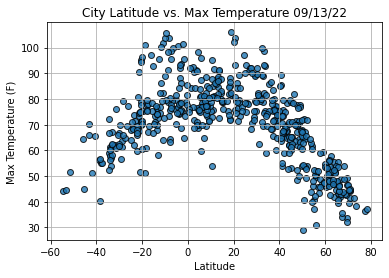

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

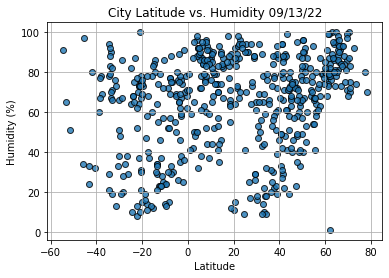

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

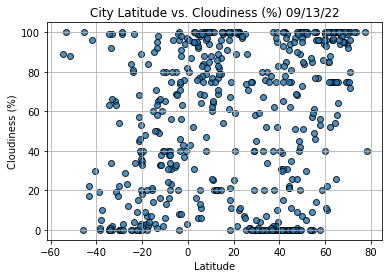

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

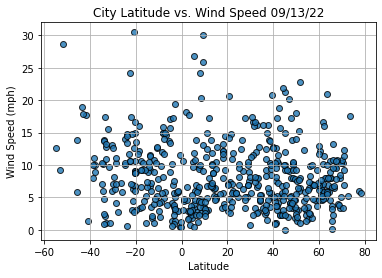

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

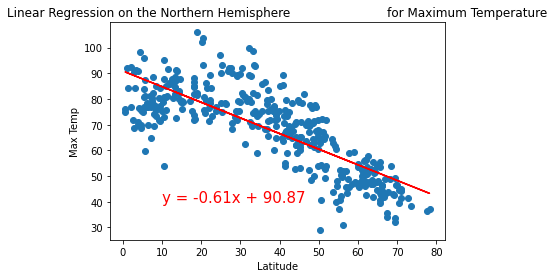

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

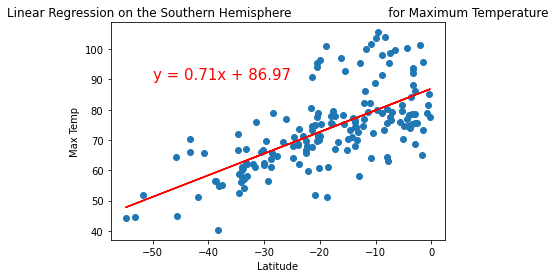

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

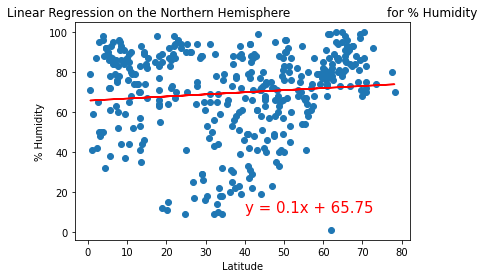

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

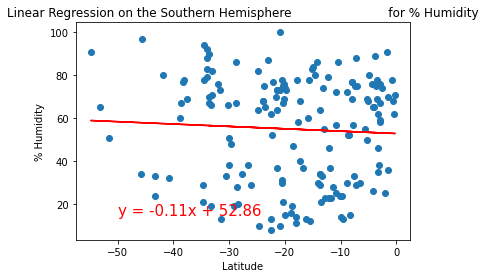

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


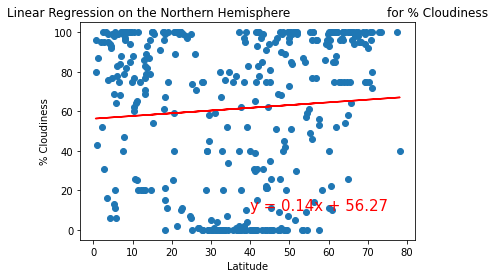

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

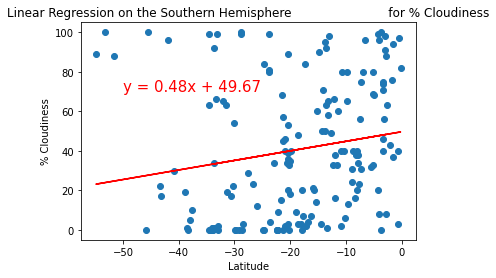

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,70))


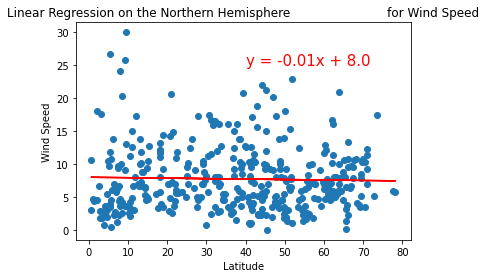

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))


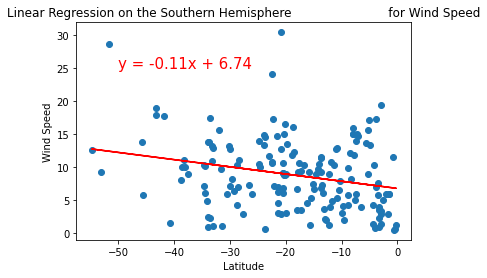

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))